### Libraries

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Loading Data

In [236]:
df = pd.read_csv('./data.csv')

In [237]:
df.head(5)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [239]:
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The dataframe has 251079 rows and 15 columns


### Data Cleaning & Understanding

#### Converting to correct type

*Column Year*
There are some string values in this column, and we are going to keep only those values that contain years.

In [240]:
for i in df.year.unique().tolist():
  if not  i.isnumeric():
      print(i)

Petrol
Automatic
Manual
Diesel
04/2017
Electric
12/2003
05/2017
04/2006
LPG
8.000 km
113.000 km
32.250 km
02/2020
06/2021
07/2021
Hybrid
03/2023
01/2019
10/2010
280.000 km
03/2015
10/2016
06/2016
80.000 km
06/2018
09/2018
39.900 km
18.990 km
05/2023
04/2013
05/2015
05/2016
07/2018
12/2022
12/2020
05/2021
108.500 km
11/2018
33.150 km
12.520 km
15.180 km
6.500 km
64.500 km
03/2019
1.000 km
01/2023
02/2023
06/2023
11/2013
49.000 km
04/2023
03/2007
159.400 km
217.946 km
75.700 km
243.431 km
CNG


In [241]:
df = df[df['year'].str.isnumeric()]
df.year = df.year.astype(int)

*Column Price in Euro*
Same thing can be observed for the price column as well. So those rows, will be omitted.

In [242]:
for i in df.price_in_euro.unique().tolist():
  if not  i.isnumeric():
      print(i)

ROSTHREI
SHA
PGD
 NAVI


In [243]:
df = df[df['price_in_euro'].str.isnumeric()]
df.price_in_euro = df.price_in_euro.astype(int)

*Column Power KW and Power PS*

In [244]:
df.power_kw = df.power_kw.astype(float)
df.power_ps = df.power_ps.astype(float)

*Fuel consumption in litres/100km*

In [246]:
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].map(lambda x: str(x).split(' ')[0])

In [248]:
condition = (df['fuel_consumption_l_100km']=='-')
df.loc[condition, 'fuel_consumption_l_100km'] = np.nan

In [249]:
df.fuel_consumption_l_100km = df.fuel_consumption_l_100km.str.replace(",",".").astype(float)

*Fuel consumption in g/ km*

In [250]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].map(lambda x: str(x).split(' ')[0])

In [251]:
condition = (df['fuel_consumption_g_km']=='-')
df.loc[condition, 'fuel_consumption_g_km'] = np.nan
df.fuel_consumption_l_100km = df.fuel_consumption_l_100km.replace(",",".").astype(float)


In [252]:
df.rename(columns={'Unnamed: 0': "ID"},inplace = True)

*Registration Date* - Dropping this column since it contains same values as the Year column

In [253]:
df.drop(columns = 'registration_date',inplace = True)

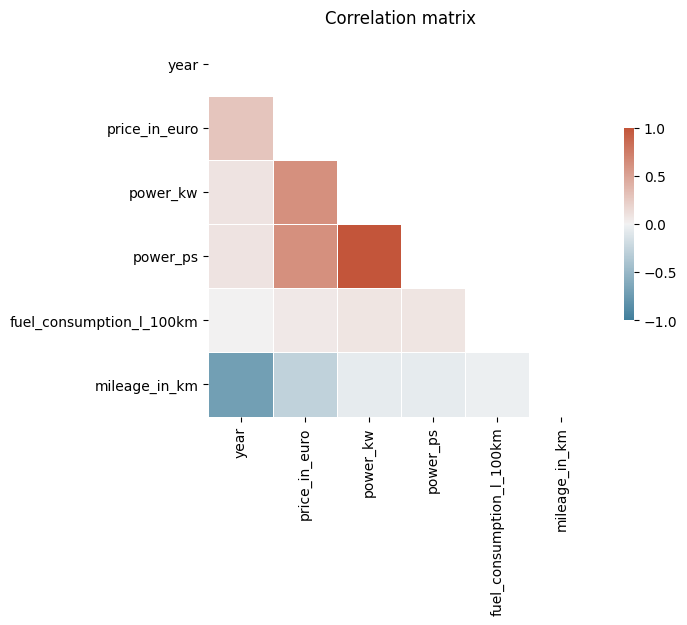

In [254]:
corr = df.loc[:, ~df.columns.isin(['ID','brand', 'model', 'color', 'transmission_type','fuel_type','offer_description'])].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation matrix")
plt.show()

In [ ]:
df

In [217]:
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')


The dataframe has 250880 rows and 14 columns


In [216]:
# def creating_box_hist(column, df):
#     # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
#     f, (ax_box, ax_dis) = plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.20, .80)},figsize=(8, 5))
#     mean=df[column].mean()
#     median=df[column].median()
#     mode=df[column].mode().tolist()[0]
#
#     f.suptitle("Data distribution of  "+ column  , fontsize=10, fontweight='bold')
#     # assigning a graph to each ax
#
#     sns.boxplot(df[column], ax=ax_box,orient = 'h',showmeans = True)
#
#     sns.despine(top=True,right=True,left=True)
#     sns.histplot(df[column],kde=False,ax=ax_dis)
#     ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
#     ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
#     ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
#     plt.legend({'Mean':mean,'Median':median,'Mode':mode})

## Missing data

In [257]:
for i in df.columns:
    print('{} column has {} missing values. Data type is {}'.format(i, df[i].isna().sum(), df[i].dtype))
print('')

ID column has 0 missing values. Data type is int64
brand column has 0 missing values. Data type is object
model column has 0 missing values. Data type is object
color column has 166 missing values. Data type is object
year column has 0 missing values. Data type is int64
price_in_euro column has 0 missing values. Data type is int64
power_kw column has 128 missing values. Data type is float64
power_ps column has 128 missing values. Data type is float64
transmission_type column has 0 missing values. Data type is object
fuel_type column has 0 missing values. Data type is object
fuel_consumption_l_100km column has 27965 missing values. Data type is float64
fuel_consumption_g_km column has 35809 missing values. Data type is object
mileage_in_km column has 62 missing values. Data type is float64
offer_description column has 0 missing values. Data type is object



In [ ]:
df['fuel_consumption_l_100km'] = df.apply(
        lambda row: float(0) if pd.isnull(row['fuel_consumption_l_100km']) & \
        ((row['fuel_type'] == 'Electric')  or \
         (row['fuel_type'] == 'Hydrogen')  or \
         (row['fuel_type'] == 'Ethanol')) else row['fuel_consumption_l_100km'],
    axis = 1)